<a href="https://colab.research.google.com/github/AIPythonILP-teamB/AIPythonILP-teamB-Python/blob/tang/IPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=5bef5520983055704aa926cd700435ed0efebd33d046a2a7cda83e6b2b6893a9
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [2]:
# 数値計算を行うライブラリ numpy をインポート
import numpy as np
# 表データを扱うライブラリ pandas をインポート
import pandas as pd
# 図や表を描画するためのライブラリをインポート
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [3]:
#すべての列を表示
pd.set_option('display.max_columns', None)

In [4]:
weather_df = pd.read_csv('weather_data_cleaned.csv')
sales_df = pd.read_csv('sales_data_cleaned.csv')

# データ結合
df = pd.merge(sales_df, weather_df, on='日付', how='left')

In [5]:
df = df.drop('曜日_y', axis=1)
df.rename(columns={'曜日_x': '曜日'}, inplace=True)

In [ ]:
df = df.drop('曜日_y', axis=1)

In [6]:
df.shape

(314, 32)

In [7]:
df.head()

,日付,曜日,来客数,総杯数,売上合計(円),ペールエール(本),ペールエール(円),ラガー(本),ラガー(円),IPA(本),IPA(円),ホワイトビール(本),ホワイトビール(円),黒ビール(本),黒ビール(円),フルーツビール(本),フルーツビール(円),平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),合計全天日射量(MJ/㎡),平均風速(m/s),最大風速(m/s),最大風速(m/s).1,平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm)
0,2024/4/1,月,16,25,25300,6,6000,5,4000,5,4500,4,3600,6,7200,0,0,14.6,19.7,11.8,3.0,2.5,3.8,14.85,2.8,6.3,南東,11.9,73.0,53.0,6.0,0.0
1,2024/4/2,火,19,25,24600,6,6000,4,3200,5,4500,3,2700,6,7200,1,1000,14.2,20.6,8.4,0.0,0.0,10.6,22.30,3.0,6.1,南,8.2,50.0,27.0,5.0,0.0
2,2024/4/3,水,11,19,18500,5,5000,4,3200,3,2700,2,1800,4,4800,1,1000,13.9,16.6,12.3,11.5,3.0,0.0,4.58,1.6,3.9,南東,13.0,83.0,57.0,10.0,0.0
3,2024/4/4,木,6,10,9500,2,2000,2,1600,2,1800,1,900,1,1200,2,2000,15.4,19.9,11.3,4.0,3.5,0.1,9.27,2.0,4.7,北西,13.6,79.0,51.0,10.0,0.0
4,2024/4/5,金,10,18,17100,3,3000,5,4000,3,2700,2,1800,3,3600,2,2000,11.4,15.1,9.0,0.5,0.5,0.0,2.97,2.8,4.9,北東,9.6,71.0,47.0,10.0,0.0


In [8]:
df['日付'] = pd.to_datetime(df['日付'], errors='coerce')

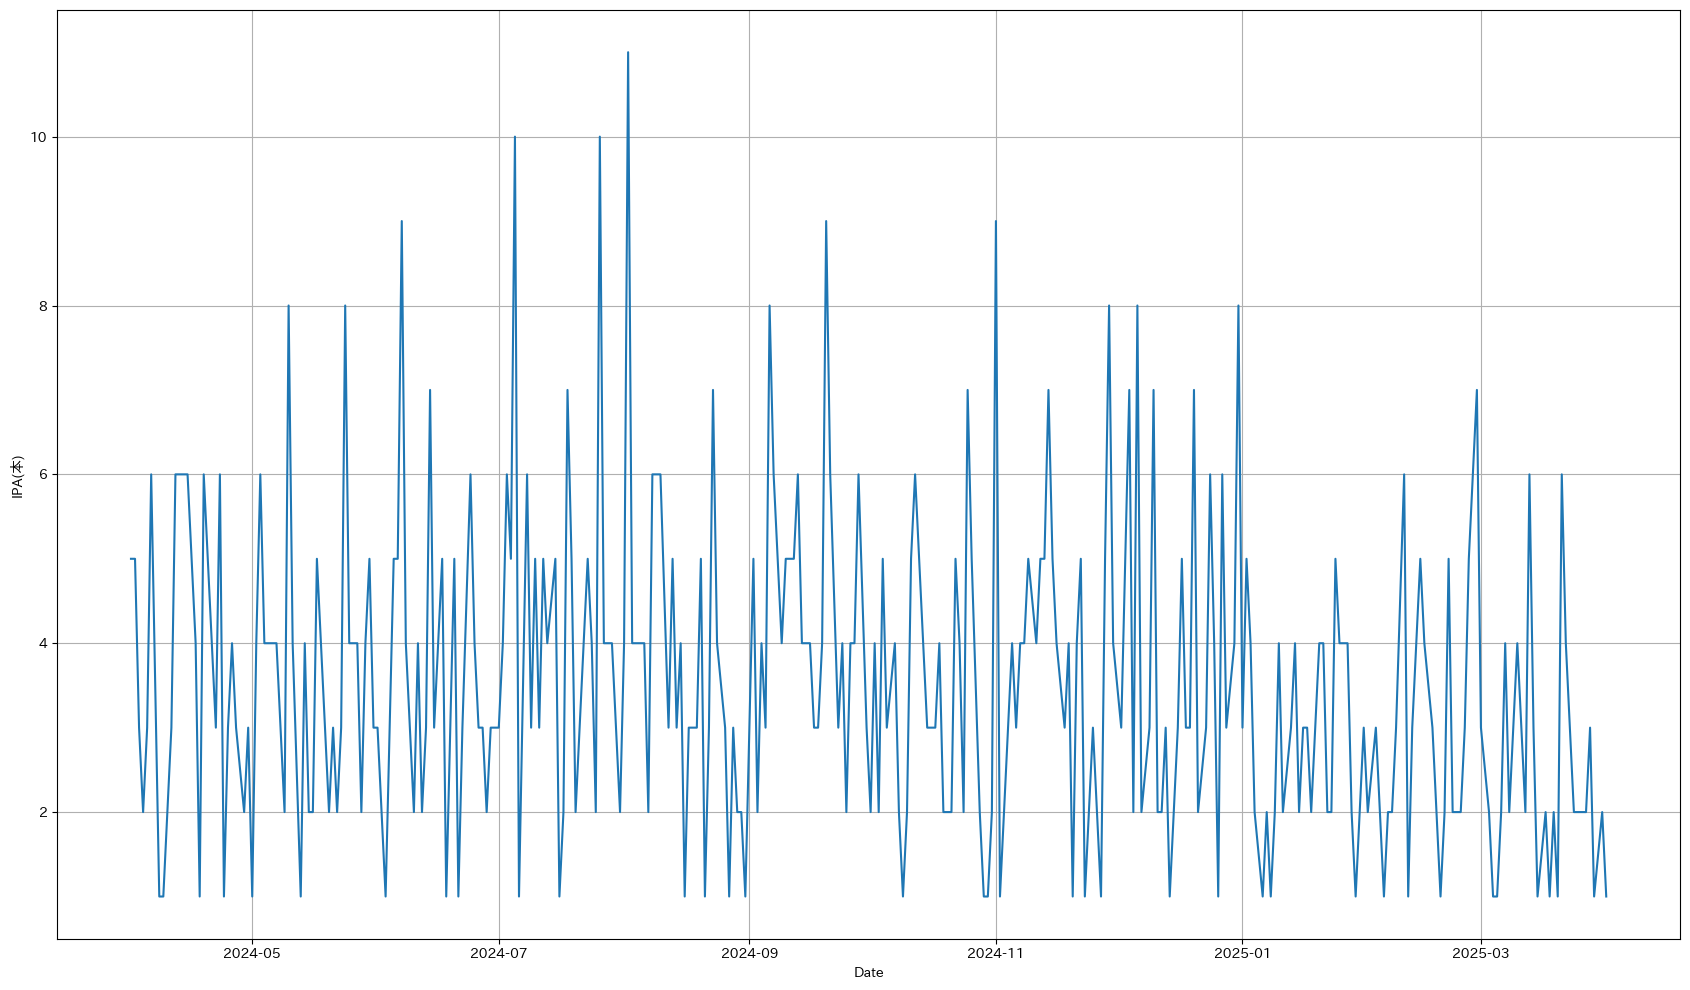

In [9]:

plt.figure(figsize=(17, 10))
plt.plot(df['日付'], df['IPA(本)'], linestyle='-')


plt.xlabel('Date')
plt.ylabel('IPA(本)')
#plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

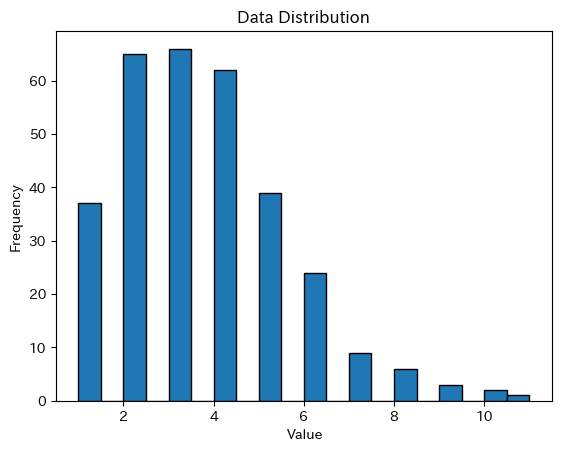

In [10]:
plt.hist(df['IPA(本)'], bins=20, edgecolor='black')
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [125]:
X = pd.concat([df.iloc[:, 1], df.iloc[:, 17:23],df.iloc[:, 24:26],df.iloc[:, 27:]], axis=1)
X.head()

,曜日,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm)
0,月,14.6,19.7,11.8,3.0,2.5,3.8,2.8,6.3,11.9,73.0,53.0,6.0,0.0
1,火,14.2,20.6,8.4,0.0,0.0,10.6,3.0,6.1,8.2,50.0,27.0,5.0,0.0
2,水,13.9,16.6,12.3,11.5,3.0,0.0,1.6,3.9,13.0,83.0,57.0,10.0,0.0
3,木,15.4,19.9,11.3,4.0,3.5,0.1,2.0,4.7,13.6,79.0,51.0,10.0,0.0
4,金,11.4,15.1,9.0,0.5,0.5,0.0,2.8,4.9,9.6,71.0,47.0,10.0,0.0


In [126]:
y = df.iloc[:, 9]
y.head()

,IPA(本)
0,5
1,5
2,3
3,2
4,3


In [127]:
X = pd.get_dummies(X, columns=[X.columns[0]], dtype=int)

In [128]:
X['IPA(本)_lag1'] = df['IPA(本)'].shift(1)
X['IPA(本)_lag2'] = df['IPA(本)'].shift(2)
X = X.dropna(subset=['IPA(本)_lag1', 'IPA(本)_lag2'])
y=y.drop(y.index[0])
y=y.drop(y.index[0])

In [108]:
X.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm),曜日_土,曜日_月,曜日_木,曜日_水,曜日_火,曜日_金,IPA(本)_lag1,IPA(本)_lag2
2,13.9,16.6,12.3,11.5,3.0,0.0,1.6,3.9,13.0,83.0,57.0,10.0,0.0,0,0,0,1,0,0,5.0,5.0
3,15.4,19.9,11.3,4.0,3.5,0.1,2.0,4.7,13.6,79.0,51.0,10.0,0.0,0,0,1,0,0,0,3.0,5.0
4,11.4,15.1,9.0,0.5,0.5,0.0,2.8,4.9,9.6,71.0,47.0,10.0,0.0,0,0,0,0,0,1,2.0,3.0
5,12.7,15.8,9.0,0.0,0.0,0.0,1.8,3.5,12.0,81.0,66.0,10.0,0.0,1,0,0,0,0,0,3.0,2.0
6,18.8,23.2,15.4,0.0,0.0,2.3,2.0,5.6,18.2,85.0,61.0,10.0,0.0,0,1,0,0,0,0,6.0,3.0


In [109]:
y.head()

,IPA(本)
2,3
3,2
4,3
5,6
6,1


In [129]:

# データセットを分割するための関数をインポート
from sklearn.model_selection import train_test_split

# データセットを「学習用データセット」と「テスト用データセット」に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [130]:

X_train.shape

(249, 21)

In [81]:
X_train.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm),曜日_土,曜日_月,曜日_木,曜日_水,曜日_火,曜日_金,IPA(本)_lag1,IPA(本)_lag2
2,13.9,16.6,12.3,11.5,3.0,0.0,1.6,3.9,13.0,83.0,57.0,10.0,0.0,0,0,0,1,0,0,5.0,5.0
163,18.8,25.3,15.1,33.5,7.0,0.0,3.0,5.4,21.3,97.0,79.0,10.0,0.0,0,0,0,0,1,0,4.0,3.0
114,31.2,35.5,28.3,0.0,0.0,11.6,3.9,7.2,31.8,70.0,56.0,4.5,0.0,0,1,0,0,0,0,6.0,6.0
64,25.9,31.7,19.5,0.0,0.0,12.7,2.7,6.5,21.7,67.0,39.0,0.0,0.0,0,0,0,0,0,1,3.0,2.0
124,28.9,32.3,27.0,0.0,0.0,5.2,4.0,6.5,32.9,83.0,69.0,9.5,0.0,0,0,0,0,0,1,3.0,1.0


In [131]:
float_cols = X.select_dtypes(include='float64').columns
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler

# スケーラーを定義
scaler = StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])

In [112]:

X_train.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm),曜日_土,曜日_月,曜日_木,曜日_水,曜日_火,曜日_金,IPA(本)_lag1,IPA(本)_lag2
2,-0.462331,-0.702095,-0.176173,0.435959,0.195677,-1.549112,-1.402113,-1.160700,-0.366449,0.878209,0.540082,1.133443,-0.0635,0,0,0,1,0,0,0.817187,0.761793
163,0.118009,0.325642,0.142694,1.924388,0.939550,-1.549112,0.409513,-0.213940,0.465245,1.746455,1.810945,1.133443,-0.0635,0,0,0,0,1,0,0.276018,-0.277585
114,1.586624,1.530575,1.645924,-0.342083,-0.362227,1.492046,1.574130,0.922172,1.517388,0.071980,0.482316,-0.506200,-0.0635,0,1,0,0,0,0,1.358355,1.281483
64,0.958910,1.081678,0.643771,-0.342083,-0.362227,1.780432,0.021307,0.480351,0.505327,-0.114072,-0.499715,-1.847726,-0.0635,0,0,0,0,0,1,-0.265151,-0.797274
124,1.314220,1.152557,1.497879,-0.342083,-0.362227,-0.185835,1.703531,0.480351,1.627613,0.878209,1.233280,0.984384,-0.0635,0,0,0,0,0,1,-0.265151,-1.316963


In [132]:
from sklearn.feature_selection import f_regression, SelectKBest, mutual_info_regression

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train, y_train)

for name, score in zip(X.columns, selector.scores_):
    print(f"{name}: F-score = {score:.2f}")

平均気温(℃): F-score = 15.25
最高気温(℃): F-score = 17.81
最低気温(℃): F-score = 11.20
降水量の合計(mm): F-score = 32.06
1時間降水量の最大(mm): F-score = 27.74
日照時間(時間): F-score = 12.02
平均風速(m/s): F-score = 5.25
最大風速(m/s): F-score = 8.50
平均蒸気圧(hPa): F-score = 5.98
平均湿度(％): F-score = 0.28
最小相対湿度(％): F-score = 0.34
平均雲量(10分比): F-score = 1.67
降雪量合計(cm): F-score = 0.77
曜日_土: F-score = 1.31
曜日_月: F-score = 0.61
曜日_木: F-score = 0.69
曜日_水: F-score = 13.71
曜日_火: F-score = 0.38
曜日_金: F-score = 57.57
IPA(本)_lag1: F-score = 2.09
IPA(本)_lag2: F-score = 0.02


In [124]:
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X_train, y_train)

for name, score in zip(X.columns, selector.scores_):
    print(f"{name}: F-score = {score:.2f}")

平均気温(℃): F-score = 0.09
最高気温(℃): F-score = 0.07
最低気温(℃): F-score = 0.00
降水量の合計(mm): F-score = 0.08
1時間降水量の最大(mm): F-score = 0.04
日照時間(時間): F-score = 0.02
平均風速(m/s): F-score = 0.04
最大風速(m/s): F-score = 0.07


In [133]:
cols_to_drop = ['平均雲量(10分比)','平均風速(m/s)', '平均蒸気圧(hPa)', '平均湿度(％)', '最小相対湿度(％)', '降雪量合計(cm)', '曜日_土', '曜日_月', '曜日_火', '曜日_木', 'IPA(本)_lag2', 'IPA(本)_lag1']
X_train = X_train.drop(columns=cols_to_drop)


In [134]:
X_test = X_test.drop(columns=cols_to_drop)

In [135]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_res=lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print(f"学習用データの決定係数: {lr_res.score(X_train, y_train):.3f}")
print(f"テスト用データセットの決定係数: {lr_res.score(X_test, y_test):.3f}")

学習用データの決定係数: 0.490
テスト用データセットの決定係数: 0.472


In [136]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=10.0, epsilon=0.1, gamma='scale')
svr_res=svr.fit(X_train, y_train)

In [137]:
# 予測値を計算
y_pred = svr_res.predict(X_test)

In [138]:
print(f"学習用データの決定係数: {svr_res.score(X_train, y_train):.3f}")
print(f"テスト用データセットの決定係数: {svr_res.score(X_test, y_test):.3f}")

学習用データの決定係数: 0.607
テスト用データセットの決定係数: 0.409


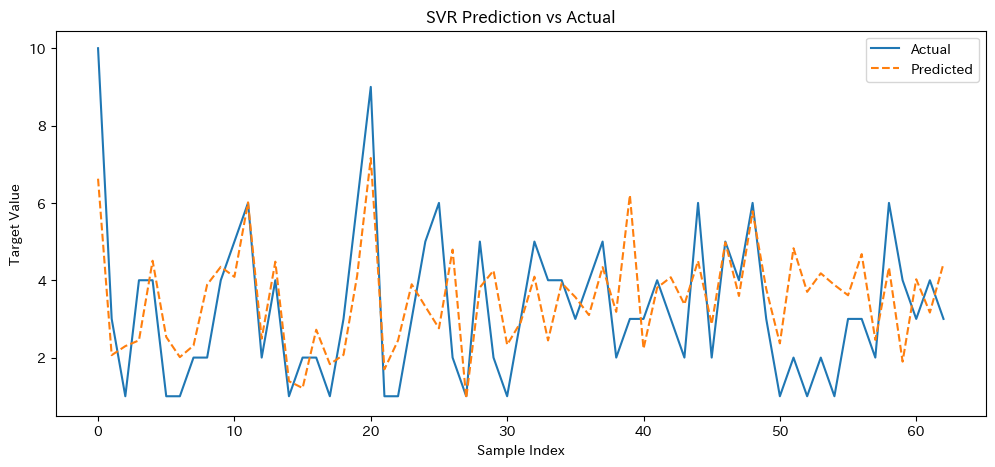

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted", linestyle='--')
plt.legend()
plt.title("SVR Prediction vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.show()

In [140]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [1, 10, 100],
    'epsilon': [ 0.05, 0.1,0.15],
    'gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(SVR(kernel='rbf'), param_grid, scoring='r2', cv=5)
grid_res=grid.fit(X_train, y_train)

# 予測値を計算
y_pred_grid = grid_res.predict(X_test)

In [141]:
print(f"学習用データの決定係数: {grid_res.score(X_train, y_train):.3f}")
print(f"テスト用データセットの決定係数: {grid_res.score(X_test, y_test):.3f}")

学習用データの決定係数: 0.490
テスト用データセットの決定係数: 0.474


In [121]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br_res=br.fit(X_train, y_train)

y_pred_br = br_res.predict(X_test)

print(f"学習用データの決定係数: {br_res.score(X_train, y_train):.3f}")
print(f"テスト用データセットの決定係数: {br_res.score(X_test, y_test):.3f}")

学習用データの決定係数: 0.448
テスト用データセットの決定係数: 0.481


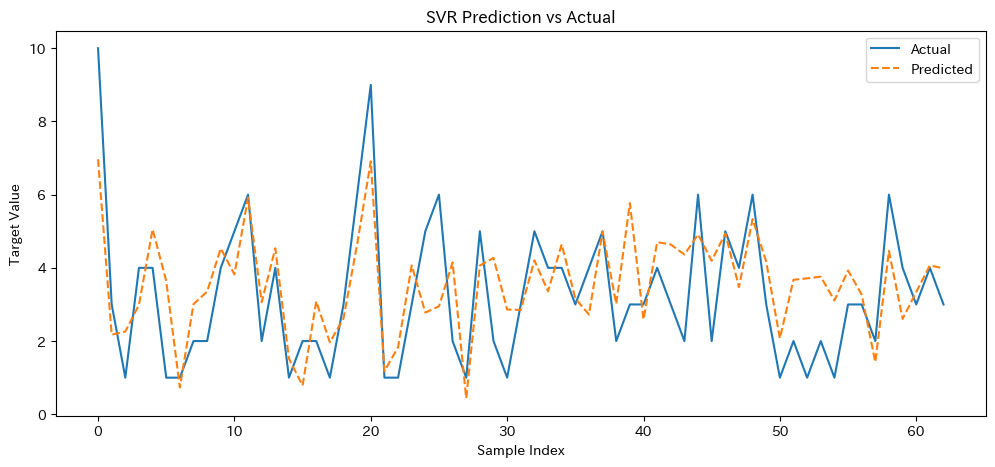

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_br, label="Predicted", linestyle='--')
plt.legend()
plt.title("SVR Prediction vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.show()

In [122]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'max_depth': [5, 8, 12],
    'min_samples_leaf': [1, 3, 5],
    'n_estimators': [100, 200]
}

rf = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='r2',
                    n_jobs=-1)

#rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_res=rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(f"学習用データの決定係数: {rf_res.score(X_train, y_train):.3f}")
print(f"テスト用データセットの決定係数: {rf_res.score(X_test, y_test):.3f}")

学習用データの決定係数: 0.623
テスト用データセットの決定係数: 0.445


In [142]:
pip install xgboost

In [146]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.6,
    random_state=42,
    reg_alpha=1
)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

r2_train = xgb_model.score(X_train, y_train)
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"学習用データの決定係数: {r2_train:.3f}")
print(f"テスト用データセットの決定係数: {r2_test:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

学習用データの決定係数: 0.805
テスト用データセットの決定係数: 0.331
MAE: 1.25
RMSE: 1.56
